In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

Here are some plotting settings as well to make sure everything looks good.

In [3]:
# ensure jupyter actually uses your fancy retina display
%config InlineBackend.figure_format = 'retina'

# make pandas show *every* column
pd.set_option("display.max_columns", None)

# various adjustments to matplotlib settings
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# use dark mode!
plt.style.use('dark_background')

In [9]:
import cogsworth
p = cogsworth.pop.Population(2000, processes=6, BSE_settings={"rtmsflag": 0})
p

<Population - 2000 systems - galactic_potential=MilkyWayPotential, SFH=Frankel2018>


Though this class is initialised, we still need to actually create the population to find its present day state. We do this by running:

In [10]:
p.create_population()

Run for 2000 binaries
Ended up with 2009 binaries with m1 > 0 solar masses
[4e-02s] Sample initial binaries


[1.5s] Evolve binaries (run COSMIC)


100%|██████████| 2009/2009 [00:12<00:00, 163.95it/s]


[17.0s] Get orbits (run gala)
Overall: 18.5s


In [11]:
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.596707,0.377086,0.0,0.0,18309.364528,290970.393028,0.338397,0.000109,0.000086,1.0,0.000000,0.000000,7.556155e+04,2.478231e+05,0.0,0.0,0.553767,0.355885,0.596707,0.377086,0.068644,0.020322,3988.021570,3669.483881,0.0,0.0,0.098160,0.306310,0.195779,0.271078,19.243657,0.823929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,9963.821550,0.596707,0.377086,0.0,0.0,18309.364528,290970.393028,0.338397,0.000112,0.000087,10.0,9963.821550,9963.821550,7.556155e+04,2.478231e+05,0.0,0.0,0.566930,0.358741,0.596707,0.377086,0.074357,0.020610,4021.005515,3667.758147,0.0,0.0,0.098160,0.306310,0.200433,0.273254,18.360403,0.810861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.315335,0.291543,0.0,0.0,90.388418,127.847024,0.091785,0.010052,0.009888,1.0,0.000000,0.000000,3.790394e+05,4.445410e+05,0.0,0.0,0.318290,0.302085,0.315335,0.291543,0.013422,0.011498,3497.944824,3454.298237,0.0,0.0,0.315335,0.291543,0.318290,0.302085,0.227116,0.129471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2007.882617,0.315335,0.291543,0.0,0.0,90.388418,127.847024,0.091785,0.010060,0.009895,10.0,2007.882617,2007.882617,3.790394e+05,4.445410e+05,0.0,0.0,0.318566,0.302308,0.315335,0.291543,0.013446,0.011515,3497.969709,3454.317960,0.0,0.0,0.315335,0.291543,0.318566,0.302308,0.226812,0.129279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.116241,0.116039,0.0,0.0,79.374517,170.054433,0.274635,0.006898,0.006892,1.0,0.000000,0.000000,2.697390e+06,2.706759e+06,0.0,0.0,0.150549,0.150310,0.116241,0.116039,0.001482,0.001474,2931.615487,2930.386762,0.0,0.0,0.058120,0.058020,0.097857,0.097701,0.000194,0.000192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,9607.743794,0.161034,0.113304,0.0,0.0,13.483725,10.955806,0.132555,0.038750,0.033324,10.0,9607.743794,9607.743794,1.096388e+06,2.214539e+06,0.0,0.0,0.185686,0.136000,0.161034,0.113304,0.004756,0.001740,3533.454914,3211.205683,0.0,0.0,0.080517,0.056652,0.120696,0.088400,0.196643,0.119959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006
2007,0.000000,0.505329,0.288244,0.0,0.0,7.617097,2.735037,0.051124,0.149757,0.122322,1.0,0.000000,0.000000,1.230290e+05,4.336275e+05,0.0,0.0,0.463572,0.293087,0.505329,0.288244,0.039880,0.012246,3805.384771,3562.655894,0.0,0.0,0.146170,0.288244,0.181381,0.293087,6.258572,0.122068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
2007,9075.795146,0.505329,0.288244,0.0,0.0,7.607525,2.729883,0.050914,0.152128,0.122961,10.0,9075.795146,9075.795146,1.230290e+05,4.336275e+05,0.0,0.0,0.470425,0.294313,0.505329,0.288244,0.041086,0.012332,3805.826979,3561.434444,0.0,0.0,0.146170,0.288244,0.184062,0.294313,131.283135,59.768939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
2008,0.000000,0.229459,0.175011,0.0,0.0,6.804624,3.234710,0.054729,0.098055,0.092226,1.0,0.000000,0.000000,7.024771e+05,1.208332e+06,0.0,0.0,0.253909,0.211021,0.229459,0.175011,0.007417,0.004067,3376.629251,3187.302117,0.0,0.0,0.114729,0.087505,0.165041,0.137164,0.023622,0.003408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008


There are of course **many** things that you can do with this table! But let's say, maybe you want get any binaries that experience mass transfer

In [12]:
# get any binaries that have an evol_type indicating Roche Lobe overflow started
mt_bin_nums = p.bpp[p.bpp["evol_type"] == 3.0]["bin_num"].unique()

Let's take a look at the evolution of the first binary in this list

In [13]:
p.bpp[p.bpp["bin_num"] == mt_bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
9,0.000000,2.377225,1.715272,1.0,1.0,157.450202,113.186015,0.203629,0.038062,0.036910,1.0,0.000000,0.000000,8.038897e+02,2.131817e+03,0.000000,0.000000,1.944626,1.624634,2.377225,1.715272,33.943240,8.810509,10035.520108,7836.859388,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7054.805189,6.663991e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9
9,803.889810,2.377225,1.715272,2.0,1.0,157.450194,113.186007,0.203629,0.087508,0.043975,2.0,803.889810,803.889810,8.038897e+02,2.131817e+03,0.277489,0.000000,4.470925,1.935624,2.377225,1.715272,65.921186,10.164087,7813.168290,7440.911704,0.041340,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1510.964471,4.694652e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,9
9,809.277544,2.377076,1.715274,3.0,1.0,157.459737,113.198337,0.203640,0.231075,0.044036,2.0,809.424382,809.275367,8.040359e+02,2.131811e+03,0.285366,0.000000,11.806337,1.938453,2.377076,1.715274,30.948146,10.168412,3979.886436,7436.272568,0.044223,0.000000,1.045865e+00,1.000000e-10,7.645414e+00,1.000000e-10,162.852039,4.681022e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,0.002177,0.0,0.0,9
9,818.015071,2.375322,1.715404,4.0,1.0,146.278437,101.377689,0.000000,0.873828,0.037834,2.0,818.161909,817.821844,8.040359e+02,2.131313e+03,0.343992,0.000000,52.072993,1.943178,2.377076,1.715404,303.470430,10.178461,3353.454626,7429.058834,0.065132,0.000000,2.031331e+00,1.000000e-10,5.200786e+01,1.000000e-10,22.484779,4.664064e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,0.193227,0.0,0.0,9
9,1013.206477,2.335190,1.718180,5.0,1.0,148.908412,104.602697,0.000000,0.790814,0.039240,2.0,1013.353315,1008.265112,8.040359e+02,2.120754e+03,0.555531,0.000000,47.779581,2.060835,2.377076,1.718180,235.716522,10.351873,3286.593172,7244.404889,0.123569,0.000000,1.779660e+00,1.000000e-10,4.765601e+01,1.000000e-10,21.929269,4.230495e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,4.941365,0.0,0.0,9
9,1014.153245,2.333996,1.718334,5.0,1.0,145.723090,101.277347,0.000000,1.001943,0.040107,3.0,1014.300082,1008.933168,8.040359e+02,2.120169e+03,0.555531,0.000000,59.232998,2.061607,2.377076,1.718334,329.468576,10.356084,3209.528615,7243.785633,0.137097,0.000000,1.778465e+00,1.000000e-10,5.909590e+01,1.000000e-10,22.659269,2.265927e+01,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,5.220077,0.0,0.0,9
9,1014.153245,2.333996,1.718334,5.0,1.0,145.723090,101.277347,0.000000,1.001943,0.040107,7.0,1014.300082,1008.933168,8.040359e+02,2.120169e+03,0.555531,0.000000,59.232998,2.061607,2.377076,1.718334,329.468576,10.356084,3209.528615,7243.785633,0.137097,0.000000,1.778465e+00,1.000000e-10,5.909590e+01,1.000000e-10,22.659269,2.265927e+01,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,5.220077,0.0,0.0,9
9,1014.153245,0.555531,1.718334,8.0,1.0,8.475288,1.896363,0.000000,1.001943,0.040107,8.0,111.668320,1008.933168,8.040359e+02,2.120169e+03,0.340355,0.000000,59.232998,2.061607,0.555531,1.718334,329.468576,10.356084,3209.528615,7243.785633,0.137097,0.000000,1.778465e+00,1.000000e-10,5.909590e+01,1.000000e-10,22.659269,2.265927e+01,0.0,0.0,0.0,0.0,0.0,0.0,-0.146837,5.220077,0.0,0.0,9
9,1014.153245,0.555531,1.718334,8.0,1.0,8.475288,1.896363,0.000000,0.066986,0.508068,4.0,111.668320,1008.933168,1.031078e+02,2.120169e+03,0.340355,0.000000,0.162743,2.061607,0.555531,1.718334,241.982575,10.356084,56684.448046,7243.785633,0.085935,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,22.659269,2.265927e+01,0.0,0.0,0.0,0.0,0.0,0.0,902.484925,5.220077,0.0,0.0,9
9,1017.465804,0.546968,1.718632,11.0,1.0,8.501194,1.908536,0.000000,0.005571,0.505660,2.0,0.000000,1011.707828,1.031078e+02,2.119041e+03,0.546968,0.000000,0.013520,2.064078,0.483104,1.718632,23.177695,10.364612,10940

We can also put this to use. Let's see how the initial orbital periods are different for binaries that experience mass transfer.

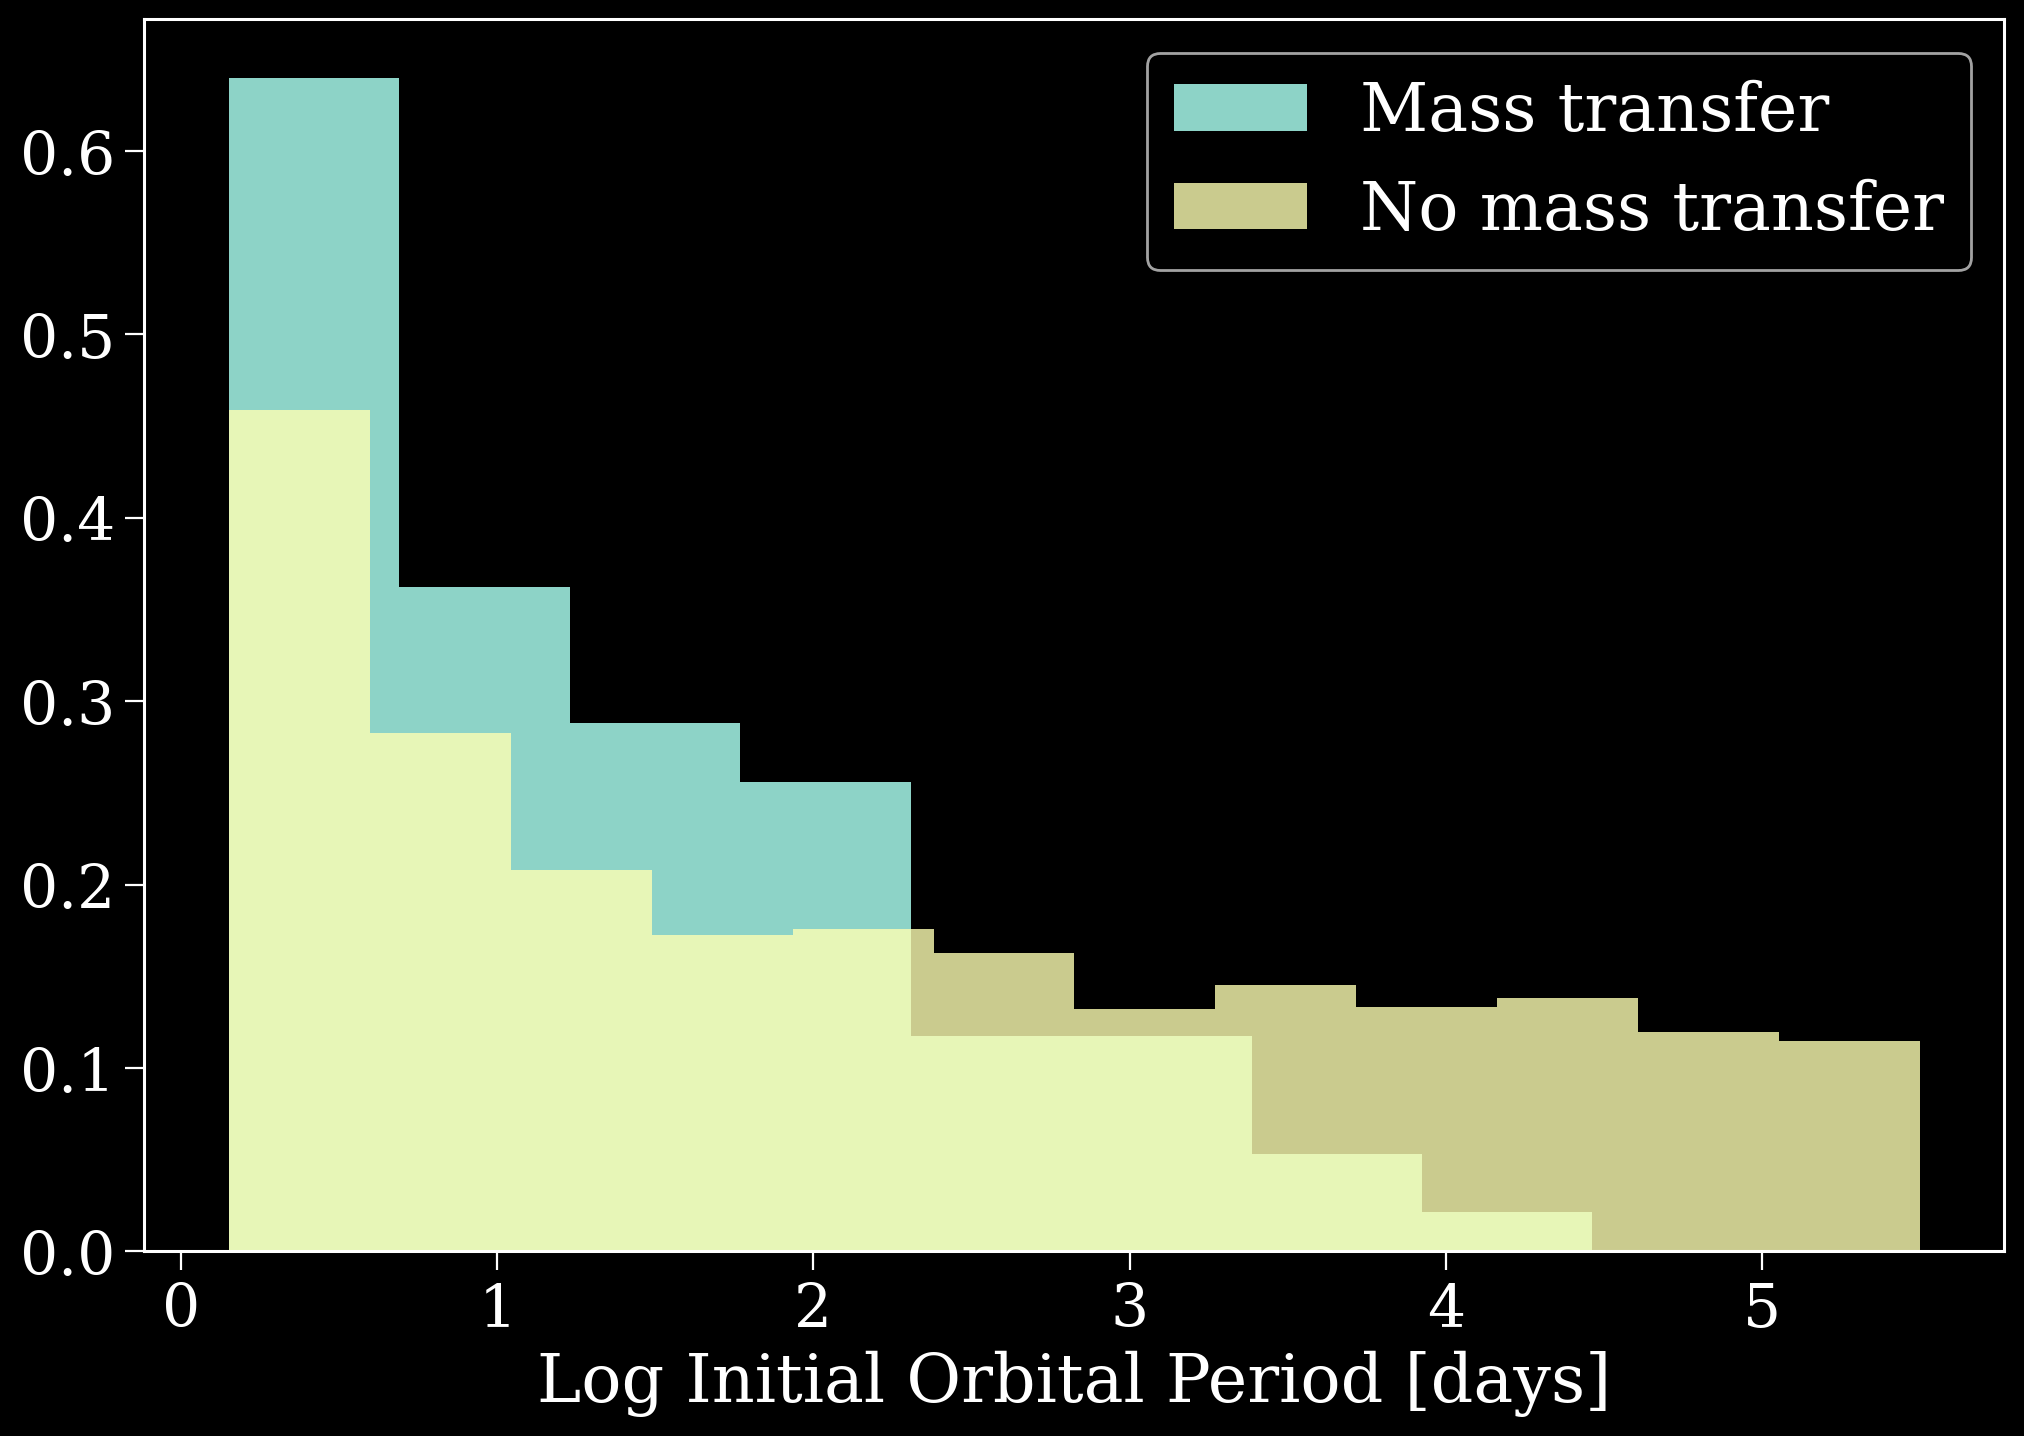

In [14]:
experienced_mt = p.initC["bin_num"].isin(mt_bin_nums)
plt.hist(np.log10(p.initC["porb"][experienced_mt]), bins="fd", density=True, label="Mass transfer")
plt.hist(np.log10(p.initC["porb"][~experienced_mt]), bins="fd", density=True, label="No mass transfer", alpha=0.8)
plt.legend()
plt.xlabel("Log Initial Orbital Period [days]");

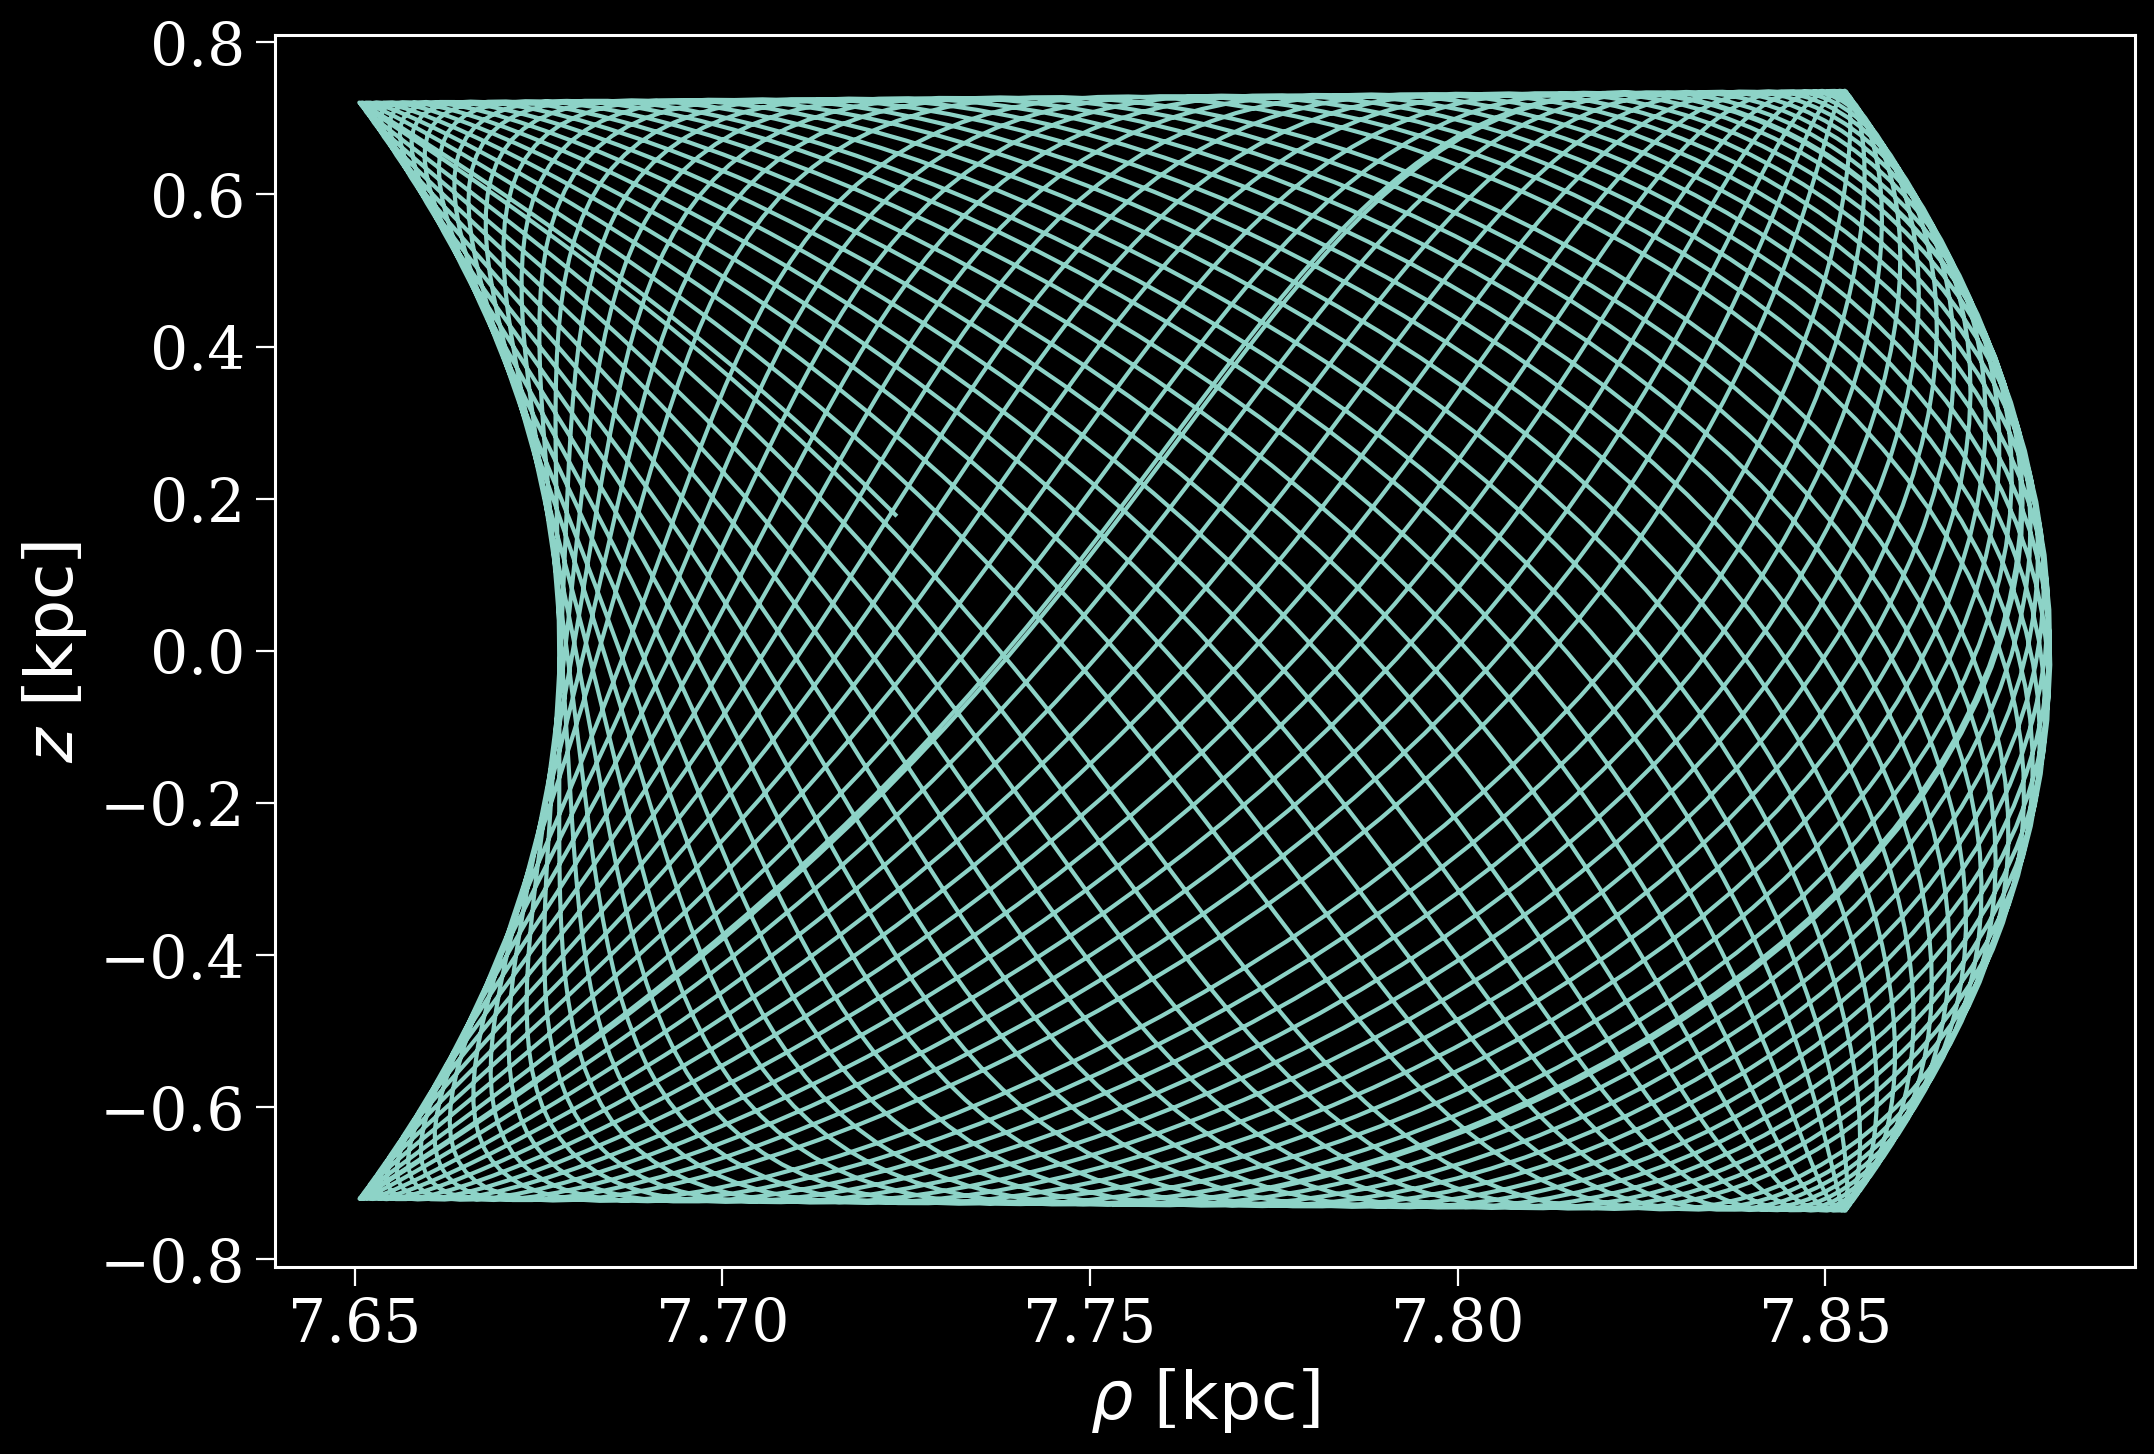

In [17]:
fig, ax = plt.subplots()
nice_orbits = p.orbits[(~p.disrupted) & (p.final_coords[0].icrs.distance < 5 * u.kpc)]
nice_orbit = np.random.choice(nice_orbits)
nice_orbit.cylindrical.plot(["rho", "z"], axes=ax)
plt.show()

In [18]:
p.final_bpp[p.disrupted]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
21,11140.894318,1.366731,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11120.258530,11112.656209,1.000000e+10,1.000000e+10,1.366731,1.277584,0.000014,0.000014,12.199026,10.101458,1.993921e-10,1.908425e-10,5822.809295,5759.361796,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.040025e+06,1.198714e+06,1.681248e+11,5.669557e+11,0.0,0.0,0.0,0.0,20.635788,28.238109,0.0,0.0,21,0.005115
56,1244.356169,3.212343,2.306620,14.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1239.690107,1239.242114,1.000000e+10,1.000000e+10,3.212343,2.306620,0.000014,0.000014,7.980200,6.594178,1.000000e-10,2.279878e-08,4967.932956,19040.726170,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,7.497184e+07,0.000000e+00,2.955080e+11,0.0,0.0,0.0,0.0,4.666062,5.114055,0.0,0.0,56,0.026986
413,7148.698912,1.277584,0.923871,13.0,11.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,7114.306216,6995.638217,1.000000e+10,1.000000e+10,1.277584,0.923871,0.000014,0.008911,8.652915,0.923871,4.656351e-10,6.127156e-05,7198.085874,5433.978478,0.000014,0.008911,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.342644e+07,6.490882e-06,3.643131e+10,0.000000e+00,0.0,0.0,0.0,0.0,34.392696,153.060695,0.0,0.0,413,0.018019
432,3195.286429,1.295301,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,3178.571036,3176.380494,1.000000e+10,1.000000e+10,1.295301,1.277584,0.000014,0.000014,12.202901,11.444460,2.354260e-09,2.335855e-09,10793.671949,10772.513338,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.231783e+05,3.245815e+07,1.601664e+13,3.074602e+11,0.0,0.0,0.0,0.0,16.715392,18.905935,0.0,0.0,432,0.024932
461,11028.413570,1.425120,2.391059,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11013.779884,11002.678441,1.000000e+10,1.000000e+10,1.425120,2.391059,0.000014,0.000014,4.146037,16.429893,2.090440e-10,2.962706e-10,5892.031176,6428.767861,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.212931e+07,1.244332e+07,5.690314e+10,5.553182e+10,0.0,0.0,0.0,0.0,14.633686,25.735129,0.0,0.0,461,0.007439
512,8940.059475,1.432076,5.097471,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,8928.221542,8921.743446,1.000000e+10,1.000000e+10,1.432076,5.097471,0.000014,0.000022,4.167888,21.261331,3.191518e-10,1.000000e-10,6549.451187,3943.749133,0.000014,0.000022,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7.252275e+06,2.000000e+08,1.744331e+11,0.000000e+00,0.0,0.0,0.0,0.0,11.837933,18.316029,0.0,0.0,512,0.010393
648,8566.640103,1.571331,1.277584,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,8549.319297,8526.258010,1.000000e+10,1.000000e+10,1.571331,1.277584,0.000014,0.000014,13.736177,8.249580,3.703960e-10,3.241857e-10,6797.859081,6575.125784,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.762778e+06,3.913235e+06,8.307316e+11,3.753096e+11,0.0,0.0,0.0,0.0,17.320806,40.382094,0.0,0.0,648,0.004777
676,2086.903713,1.277584,1.287615,13.0,12.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,2058.772098,2023.185679,1.000000e+10,1.000000e+10,1.277584,1.287615,0.000014,0.003496,10.018892,1.287615,5.560250e-09,2.449962e-04,13380.710169,12267.810129,0.000014,0.003496,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.861793e+07,3.025694e-05,7.724554e+11,0.000000e+00,0.0,0.0,0.0,0.0,28.131615,63.718034,0.0,0.0,676,0.006466
773,2830.778879,1.242000,1.424223,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,2800.423424,2793.733150,1.000000e+10,1.000000e+10,1.242000,1.424223,0.000014,0.000014,1.824998,13.148551,2.948791e-09,3.247562e-09,11418.698565,11697.551564,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.604783e+07,2.247812e+07,4.016314e+11,4.667442e+11,0.0,0.0,0.0,0.0,3

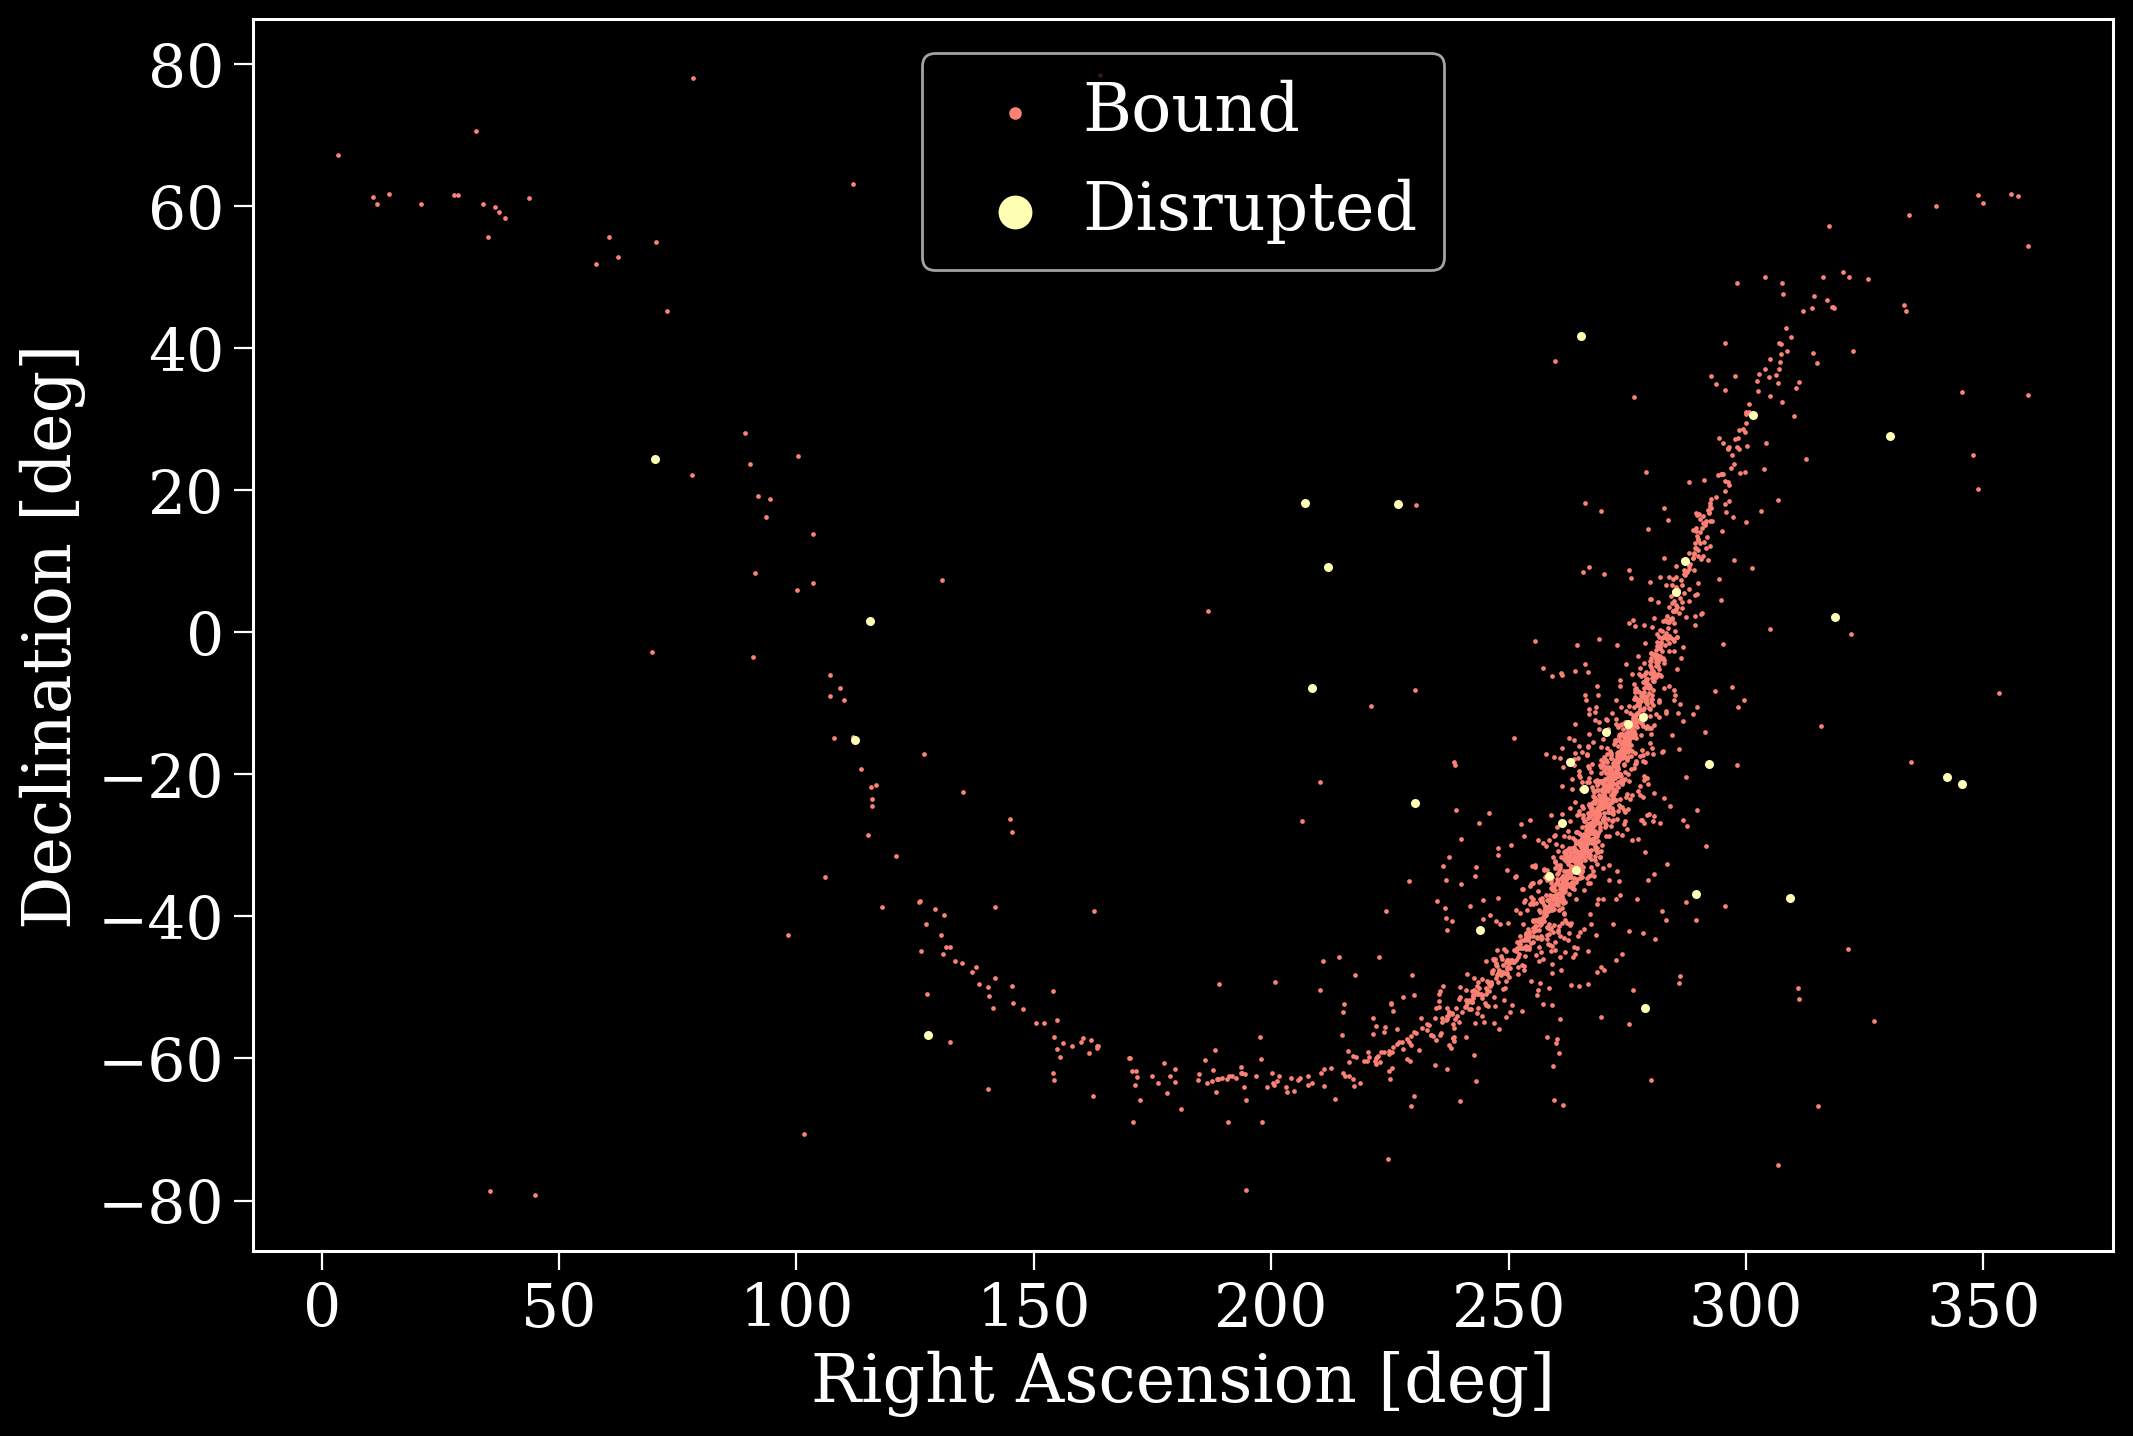

In [19]:
plt.scatter(p.final_coords[0][~p.disrupted].icrs.ra, p.final_coords[0][~p.disrupted].icrs.dec, s=0.5, c="C3", label="Bound")
plt.scatter(p.final_coords[0][p.disrupted].icrs.ra, p.final_coords[0][p.disrupted].icrs.dec, s=5, c="C1")
plt.scatter(p.final_coords[1][p.disrupted].icrs.ra, p.final_coords[1][p.disrupted].icrs.dec, s=5, c="C1", label="Disrupted")
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.legend(markerscale=5, handletextpad=.0)
plt.show()

And we see that often (but not always) they are found off the galactic plane (due to the same supernova kick that disrupted binary)

# Classify population
The Population can also classify the present-day state of each binary. You can autogenerate these classes by accessing ``p.classes``

In [20]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2,pisn-1,pisn-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2006,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2007,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This table has a flag for each class and for each binary. We can do some pandas DataFrame manipulation to get some statistics for the different classes

In [21]:
p.classes.astype(int).sum()

dco                     0
co-1                   15
co-2                   12
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             0
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             0
widow-1                 0
widow-2                 0
stellar-merger-co-1     5
stellar-merger-co-2    11
pisn-1                  0
pisn-2                  0
dtype: int64

# Predict observables
You can also use the Population class to predict what we might actually observe for this population in different filters. This uses dust maps to correct for extinction, applies bolometric corrections and blends the stars if necessary.

In [22]:
p.observables

,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,J_app_1,J_app_2,J_abs_1,J_abs_2,H_app_1,H_app_2,H_abs_1,H_abs_2,K_app_1,K_app_2,K_abs_1,K_abs_2,G_app_1,G_app_2,teff_obs,log_g_obs,secondary_brighter,G_abs_1,G_abs_2,BP_app_1,BP_app_2,BP_abs_1,BP_abs_2,RP_app_1,RP_app_2,RP_abs_1,RP_abs_2
0,4.290000,6.0,7.561698,22.139043,8.954780,23.532125,21.589705,inf,5.682201,inf,20.399318,inf,4.978432,inf,19.945928,inf,4.819581,inf,25.362632,inf,4021.005515,4.706770,False,7.732660,inf,27.402319,inf,8.567370,inf,24.114370,inf,6.853477,inf
1,5.643000,6.0,9.418535,24.735506,9.586823,24.903794,23.923926,inf,6.940902,inf,22.656781,inf,6.284680,inf,22.081041,inf,6.082971,inf,28.448890,inf,3497.969709,4.930442,False,9.593185,inf,31.635087,inf,10.858016,inf,27.075511,inf,8.521119,inf
2,6.000000,6.0,11.812141,26.702897,11.817415,26.708171,25.678785,inf,9.068617,inf,24.360298,inf,8.379789,inf,23.742411,inf,8.152160,inf,30.749388,inf,2931.479966,5.147553,False,12.508197,inf,35.123723,inf,14.683073,inf,29.319289,inf,11.241326,inf
3,2.626231,6.0,8.306769,23.137480,9.991449,24.822161,22.109784,inf,6.392140,inf,21.112248,inf,5.711899,inf,20.725505,inf,5.520805,inf,25.468624,inf,3749.820218,4.805419,False,8.717359,inf,27.211834,inf,9.726962,inf,24.278795,inf,7.746901,inf
4,4.455000,6.0,10.527601,25.276930,10.561303,25.310632,24.287095,inf,8.062348,inf,23.058973,inf,7.370197,inf,22.511234,inf,7.153591,inf,28.436134,inf,3469.466907,5.083930,False,10.456999,inf,30.973678,inf,11.549629,inf,27.121283,inf,9.457719,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,1.914000,6.0,7.718899,22.702200,9.909984,24.893285,21.702216,inf,6.067602,inf,20.832695,inf,5.425263,inf,20.551303,inf,5.285166,inf,24.366291,inf,4273.786205,4.804712,False,7.852718,inf,25.506698,inf,8.533503,inf,23.347674,inf,7.068121,inf
2005,1.122000,6.0,8.674090,21.781179,10.274966,23.382055,20.328460,inf,6.722693,inf,19.494869,inf,6.053408,inf,19.190958,inf,5.856721,inf,23.166021,inf,3693.311203,4.866751,False,9.111457,inf,24.499230,inf,10.168157,inf,22.077363,inf,8.121635,inf
2006,6.000000,6.0,10.546799,26.993838,11.638318,28.085356,26.643874,inf,8.475707,inf,25.292565,inf,7.755226,inf,24.684732,inf,7.533744,inf,31.104496,inf,3533.454914,5.107426,False,10.880052,inf,34.031194,inf,11.985981,inf,29.751095,inf,9.877845,inf
2007,6.000000,6.0,8.205751,22.372733,9.512395,23.679378,22.135738,inf,6.246429,inf,20.825337,inf,5.567816,inf,20.252930,inf,5.380732,inf,26.488649,inf,3805.826979,4.796661,False,8.469774,inf,29.249415,inf,9.418934,inf,25.147656,inf,7.529585,inf


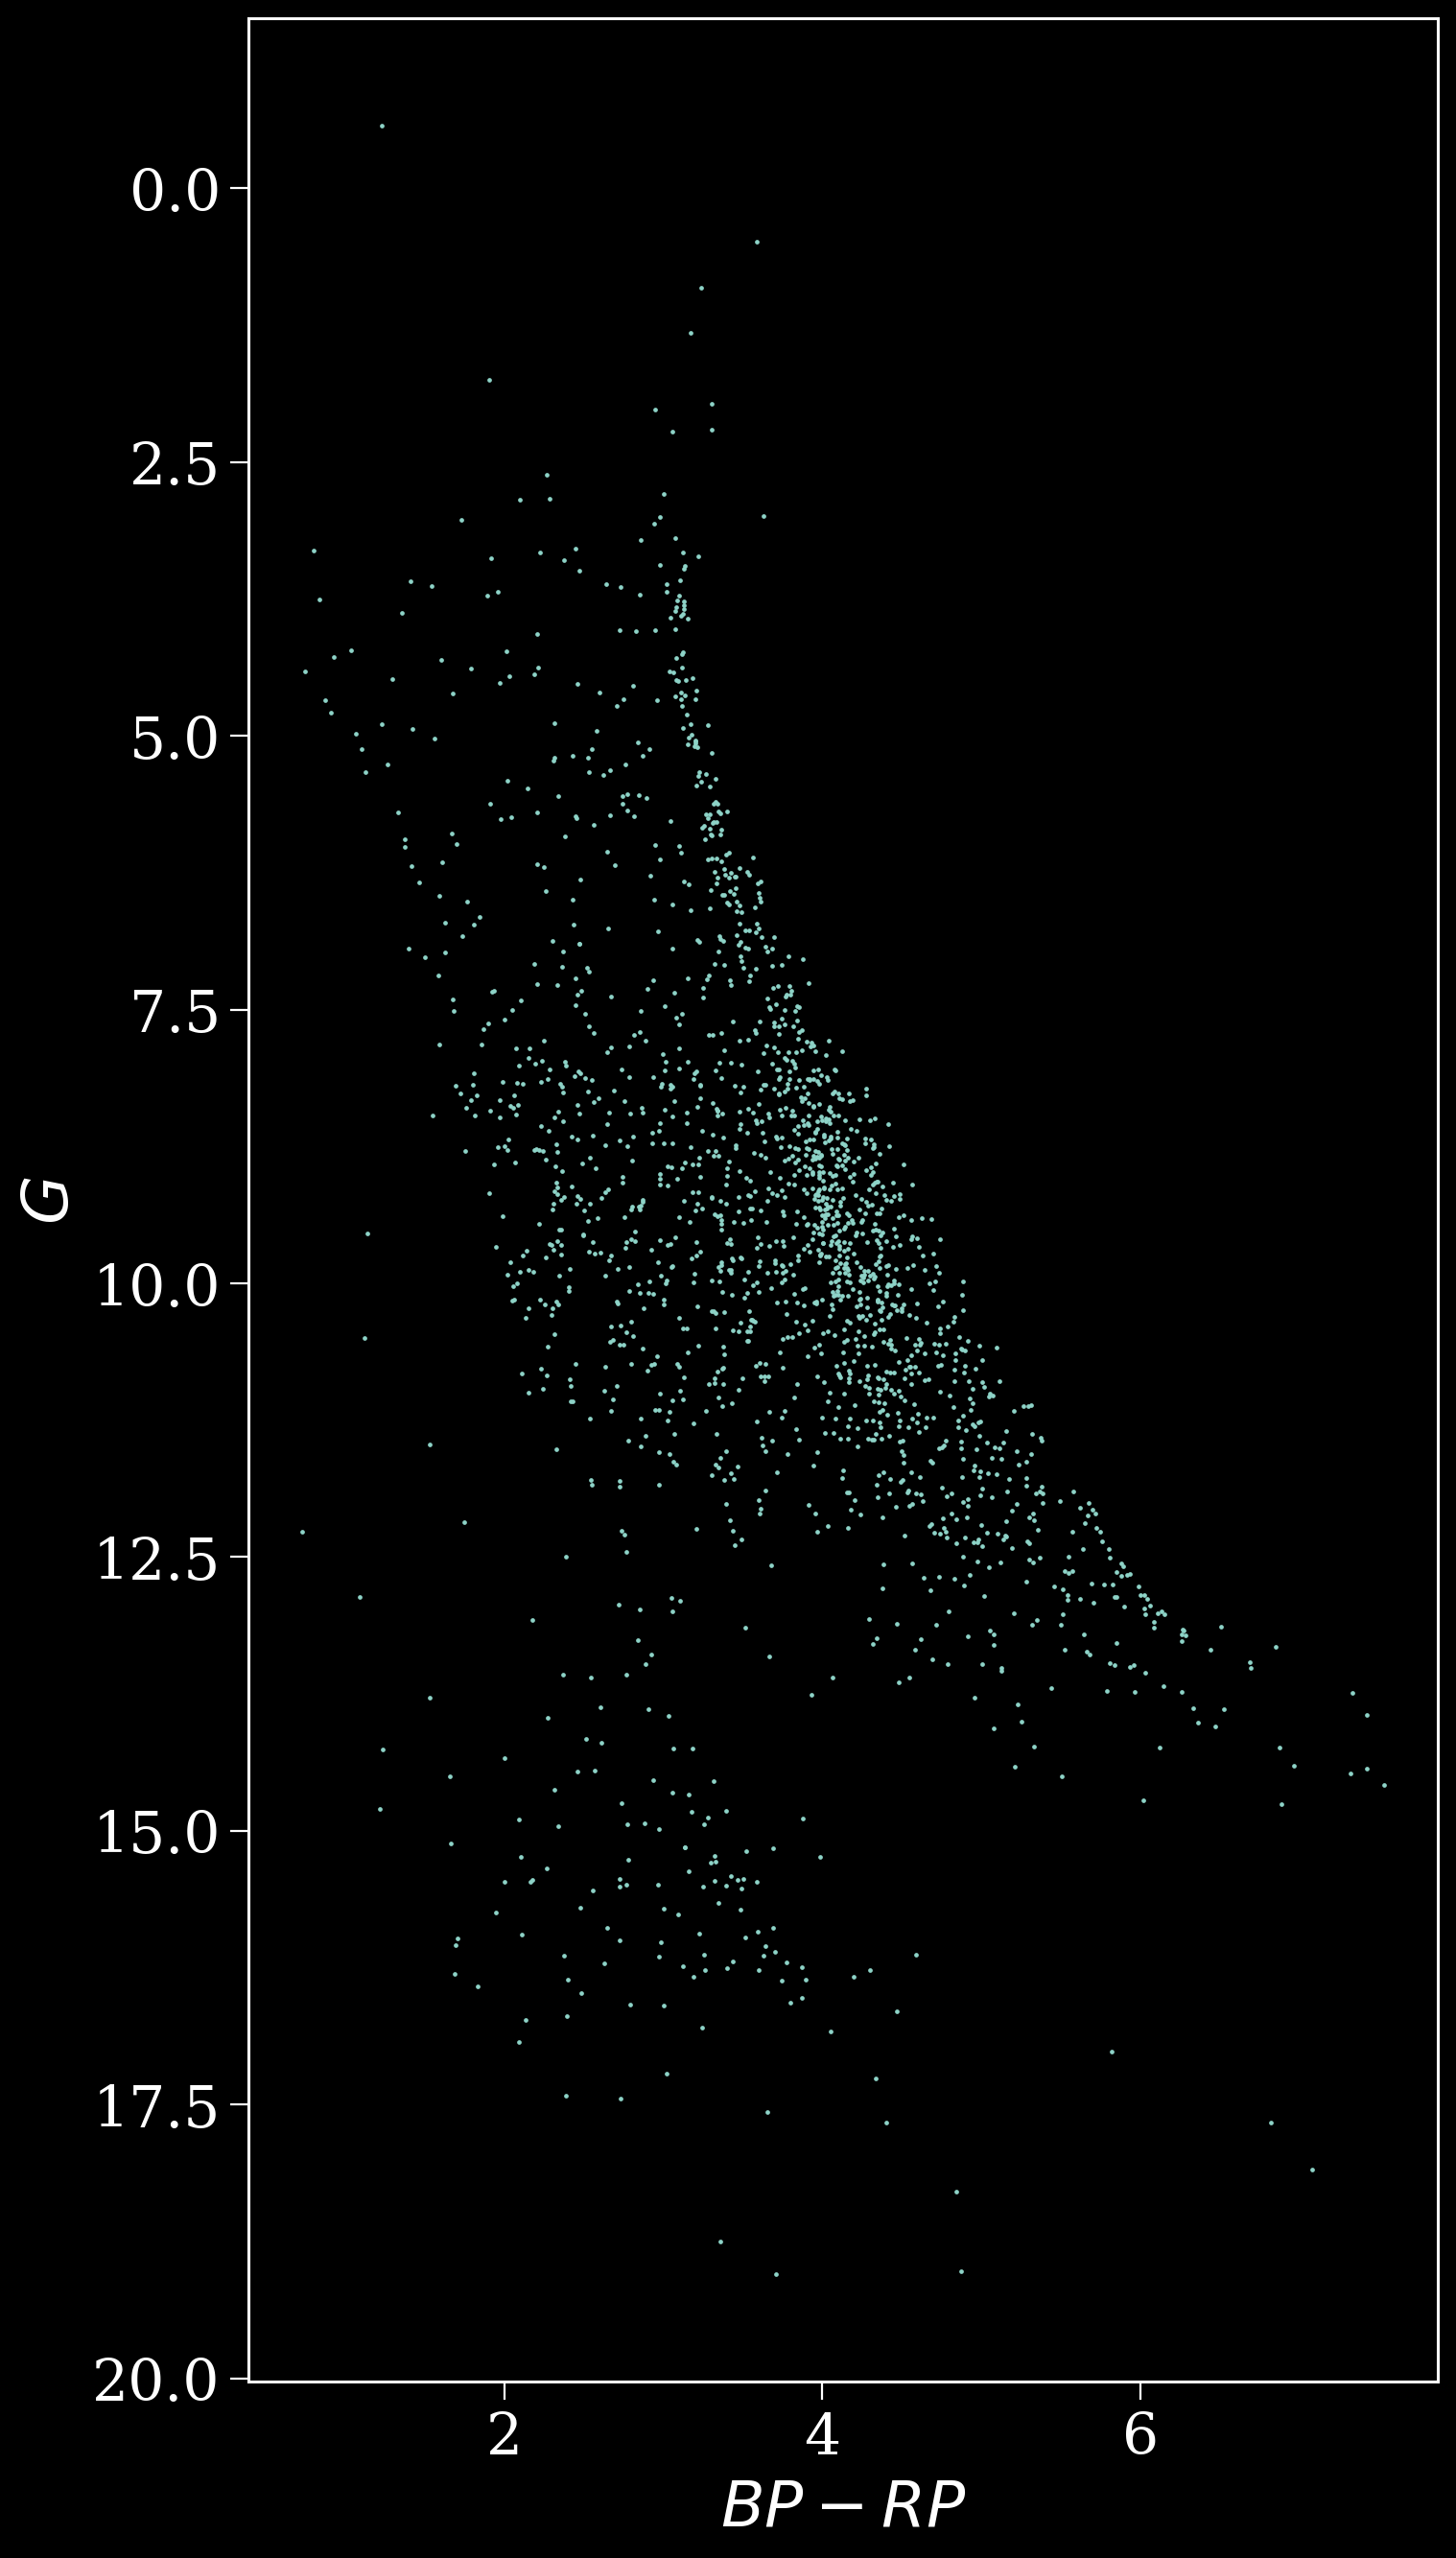

In [23]:
plt.figure(figsize=(8, 16))
plt.scatter(p.observables["BP_app_1"] - p.observables["RP_app_1"],
            p.observables["G_abs_1"], s=0.5)
plt.ylim(reversed(plt.ylim()))
plt.xlabel(r"$BP-RP$")
plt.ylabel(r"$G$")
plt.show()

And that's it for your quickstart introduction to ``cogsworth``! If you're interested in learning more you've got a couple of options! You could:

- Check out [the other tutorials](tutorials.html) for more step-by-step guides of using ``cogsworth``
- Browse the [gallery of examples](../auto_examples/index.html) to see how you could put ``cogsworth`` to use
- Search through the [user guide](modules.html) if you want to know how a specific class or function works

Hope you enjoy using ``cogsworth``!